# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

X_train shape: (123, 11)
y_train shape: (123, 1)
X_test shape: (41, 11)
y_test shape: (41, 1)
Variáveis preditoras (X_train): ['Age', 'Income', 'Number of Children', 'Gender_encoded', 'MaritalStatus_encoded', 'Home Ownership_encoded', "Education_Associate's Degree", "Education_Bachelor's Degree", 'Education_Doctorate', 'Education_High School Diploma', "Education_Master's Degree"]
Variáveis preditoras (X_test): ['Age', 'Income', 'Number of Children', 'Gender_encoded', 'MaritalStatus_encoded', 'Home Ownership_encoded', "Education_Associate's Degree", "Education_Bachelor's Degree", 'Education_Doctorate', 'Education_High School Diploma', "Education_Master's Degree"]
Variável resposta (y_train): ['Credit Score_encoded']
Variável resposta (y_test): ['Credit Score_encoded']


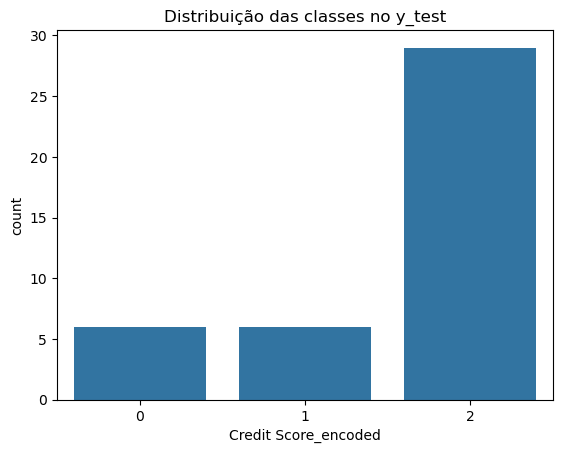

Distribuição de y_test:
Credit Score_encoded
2    29
1     6
0     6
Name: count, dtype: int64


In [11]:
# Subir bases
X_train = pd.read_csv('X_train_final.csv')
y_train = pd.read_csv('y_train_final.csv')
X_test = pd.read_csv('X_test_final.csv')
y_test = pd.read_csv('y_test_final.csv')

# Tamanho das bases
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Verificando as colunas
print(f'Variáveis preditoras (X_train): {list(X_train.columns)}')
print(f'Variáveis preditoras (X_test): {list(X_test.columns)}')
print(f'Variável resposta (y_train): {list(y_train.columns)}')
print(f'Variável resposta (y_test): {list(y_test.columns)}')

# Distribuição das classes no y_test
sns.countplot(data=y_test, x=y_test.columns[0])
plt.title('Distribuição das classes no y_test')
plt.show()

print('Distribuição de y_test:')
print(y_test[y_test.columns[0]].value_counts())

# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [14]:
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train.values.ravel())

GaussianNB()

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

In [16]:
y_pred_train = modelo_nb.predict(X_train)
acuracia_train = accuracy_score(y_train, y_pred_train)
print(f'Acurácia (treinamento): {acuracia_train:.4f}')

Acurácia (treinamento): 0.9756


In [18]:
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f'Recall (macro - treinamento): {recall_train:.4f}')

Recall (macro - treinamento): 0.9738


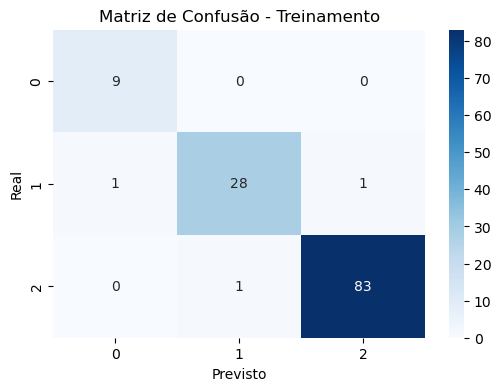

In [20]:
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Treinamento')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

**Acurácia**: 97,56%, indicando que ele acertou quase todas as previsões no conjunto de treinamento.

**Recall**: 97,38%, mostrando que o modelo conseguiu manter um bom equilíbrio no reconhecimento de todas as classes, mesmo em um cenário de múltiplas categorias.

**Matriz de confusão**: reforça essa conclusão, pois apresentou apenas dois erros: uma confusão da classe 1 com a 0, e da classe 2 com a 1. No geral, o modelo demonstrou um ótimo desempenho e está bem ajustado para os dados de treinamento.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [24]:
y_pred_test = modelo_nb.predict(X_test)
acuracia_test = accuracy_score(y_test, y_pred_test)
print(f'Acurácia (teste): {acuracia_test:.4f}')

Acurácia (teste): 1.0000


In [26]:
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f'Recall (macro - teste): {recall_test:.4f}')

Recall (macro - teste): 1.0000


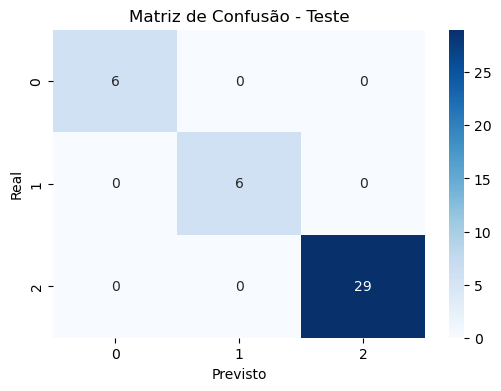

In [28]:
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Teste')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

**Acurácia**: 100%, indicando que o modelo acertou todas as previsões no conjunto de teste, sem cometer qualquer erro.

**Recall**: 100%, mostrando que o modelo conseguiu reconhecer perfeitamente todas as classes, sem falhas, mesmo sendo um problema com múltiplas categorias.

**Matriz de confusão**: reforça essa conclusão, pois todas as previsões foram corretas, sem qualquer confusão entre as classes — cada valor real foi previsto corretamente, demonstrando um desempenho perfeito na base de teste.

O desempenho na base de teste foi ainda melhor que no treinamento, onde houve dois pequenos erros. No teste, o modelo obteve acerto total. Isso sugere que o modelo está muito bem ajustado aos dados e conseguiu generalizar perfeitamente neste caso.

# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

Nesse projeto, criei um modelo preditivo usando o algoritmo Naive Bayes para classificar o score de crédito dos clientes. Todo o processo começou com a preparação e o tratamento dos dados, para depois aplicar o modelo e fazer as previsões sobre a base de crédito.

A ideia principal foi testar se o Naive Bayes consegue resolver bem um problema de classificação com várias categorias, identificando corretamente o score dos clientes com base nas informações disponíveis. Também avaliei o desempenho do modelo usando métricas como acurácia, recall e a matriz de confusão, tanto na base de treino quanto na de teste, para entender se ele estava funcionando de forma eficiente.